In [309]:
# Installations
#pip install pygame
#pip install gymnasium

In [310]:
# Libraries
import gymnasium as gym
import re  
import numpy as np

In [311]:
# What is the game all about?
import inspect
from gymnasium.envs.toy_text.taxi import TaxiEnv
print(inspect.getsource(TaxiEnv))

class TaxiEnv(Env):
    """
    The Taxi Problem involves navigating to passengers in a grid world, picking them up and dropping them
    off at one of four locations.

    ## Description
    There are four designated pick-up and drop-off locations (Red, Green, Yellow and Blue) in the
    5x5 grid world. The taxi starts off at a random square and the passenger at one of the
    designated locations.

    The goal is move the taxi to the passenger's location, pick up the passenger,
    move to the passenger's desired destination, and
    drop off the passenger. Once the passenger is dropped off, the episode ends.

    The player receives positive rewards for successfully dropping-off the passenger at the correct
    location. Negative rewards for incorrect attempts to pick-up/drop-off passenger and
    for each step where another reward is not received.

    Map:

            +---------+
            |R: | : :G|
            | : | : : |
            | : : : : |
            | | : | : |
    

# Taxi Issue – Overview

The **Taxi-v3 environment** from OpenAI Gym is a classic **reinforcement learning problem**, where a taxi must efficiently pick up passengers and drop them off at their destinations. The setup includes a clearly defined environment, a reward system, an agent, and a policy.

---

### Environment
The environment is a **5x5 grid world**, where:
- The taxi can move (up, down, left, right).
- There are four fixed locations (e.g., R, G, B, Y) where passengers can be picked up or dropped off.
- At the start of an episode, one passenger is randomly placed at one of these locations, and a destination is chosen.
- The taxi itself also starts at a random position.

---

### Reward System
The taxi receives **rewards and penalties** during an episode:
- **+20 points** for successfully dropping off the passenger at the correct destination (main goal).
- **-1 point** for each timestep (to encourage efficiency).
- **-10 points** for attempting an illegal pick-up or drop-off (wrong location or no passenger).

---

### Agent
The **agent** is the taxi.  
It interacts with the environment by choosing actions:
- Move up, down, left, or right
- Pick up passenger
- Drop off passenger

---

### Policy and Q-Table
The **policy** is the agent’s learned strategy:  
It defines **which action to take in each state** in order to maximize cumulative rewards.  
For example, an optimal policy ensures the taxi:
- Navigates toward the passenger efficiently
- Picks them up at the right spot
- Drives directly to the destination
- Drops them off correctly

To learn an optimal policy, we use a **Q-table**:

- **Rows**: represent all possible states (taxi position, passenger location, destination).  
- **Columns**: represent all possible actions (move, pick-up, drop-off).  
- **Entries**: store the expected reward (Q-value) for taking an action in a given state.  

The Q-table is updated iteratively using **Q-learning**, allowing the taxi to improve its strategy over time.  


# Phase 1: Set Up

In this phase, we initialize the Taxi-v3 environment and prepare the agent for learning using Q-learning. The main steps are:

---

## 1.1 Initialize the Environment  
The Taxi-v3 environment is created with `render_mode="ansi"` for text-based output.

---

## 1.2 Q-Table Creation  
A Q-table of shape `(state_size, action_size)` is initialized with zeros.  

- **Rows:** represent all possible states.  
- **Columns:** represent all possible actions.  
- **Cells:** store the expected future reward (Q-value) of taking that action in that state.

### 2.1 State Mapping  
Each row corresponds to a unique state, defined by:  
- Taxi’s position on the 5x5 grid  
- Passenger location  
- Destination  

This mapping ensures that every possible configuration of the environment has a dedicated row in the Q-table.

### 2.2 Action Index Mapping  
Actions are represented as integers in the Q-table:  
- `0 = south`  
- `1 = north`  
- `2 = east`  
- `3 = west`  
- `4 = pickup`  
- `5 = dropoff`  

---

✅ With this setup, the agent can systematically explore the environment, store learned rewards, and eventually learn an optimal policy.


In [312]:
# Phase 1: Set up

# 1.1 Initialize the environment 
env = gym.make("Taxi-v3", render_mode="ansi")

# 1.2 Create Q-table
Q = np.zeros((state_size, action_size))
print(Q.shape)

# Index → Action
# 0 = south
# 1 = north
# 2 = east
# 3 = west
# 4 = pickup
# 5 = dropoff

# We create the Q-table to store all possible and unique
# combinations of states and actions in the taxi environment.

print("Q-table after initialization:")
print(Q)


(500, 6)
Q-table after initialization:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.

# Phase 2: Training 
The agent is trained using **Q-Learning**, which updates values in the Q-table iteratively.

### 2.1 Hyperparameters

Before training the agent, we define the following hyperparameters:

### Learning Rate (α)  
- `alpha = 0.7`  
- Controls how much new information overrides existing Q-values.  

### Discount Factor (γ)  
- `gamma = 0.95`  
- Determines how much future rewards are considered compared to immediate rewards.  

### Exploration vs. Exploitation (ε)  
- `epsilon = 1.0` → initial exploration rate.  
- `min_epsilon = 0.05` → minimum exploration rate to avoid complete exploitation.  
- `decay = 0.9999` → factor by which epsilon decreases after each episode.  

### Episodes  
- `episodes = 200000`  
- Number of training iterations (episodes) the agent will experience.

### 2.2 Episode Initialization  
At the start of each episode, the environment is reset, and the agent begins in a random state.  

### 2.3 ε-Greedy Policy  
- With probability `ε`, the agent chooses a random action (**exploration**).  
- With probability `1 - ε`, it chooses the action with the highest Q-value (**exploitation**).  

### 2.4 Q-Value Update  
Q-values are updated using the Q-learning rule:

\[
Q(s, a) \leftarrow Q(s, a) + \alpha \big[ r + \gamma \max_a Q(s', a) - Q(s, a) \big]
\]

### 2.5 Epsilon Decay  
After each episode, epsilon is decayed until it reaches `min_epsilon`, reducing exploration over time.  

### 2.6 Progress Monitoring  
Training progress is printed every **10,000 episodes**, showing episode number, epsilon value, and the last reward.

In [313]:
# 2. Training

# Hyperparameter
alpha = 0.7
gamma = 0.95
epsilon = 1.0
min_epsilon = 0.05
decay = 0.9999
episodes = 200000

rewards = []
epsilons = [] 

for episode in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        # ε-greedy action
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Q-Learning Update
        best_next = np.max(Q[next_state])
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * best_next - Q[state, action]
        )

        state = next_state
        total_reward += reward

    # save rewards of episode
    rewards.append(total_reward)
    epsilons.append(epsilon)

    # ε-decay
    epsilon = max(min_epsilon, epsilon * decay)

    # Print progress every 10k episodes
    if (episode + 1) % 10000 == 0:
        print(
            f"Episode {episode + 1}/{episodes}, "
            f"epsilon={epsilon:.4f}, last reward={total_reward}"
        )

print("Training completed!")


Episode 10000/200000, epsilon=0.3679, last reward=-30
Episode 20000/200000, epsilon=0.1353, last reward=4
Episode 30000/200000, epsilon=0.0500, last reward=11
Episode 40000/200000, epsilon=0.0500, last reward=-9
Episode 50000/200000, epsilon=0.0500, last reward=8
Episode 60000/200000, epsilon=0.0500, last reward=10
Episode 70000/200000, epsilon=0.0500, last reward=-4
Episode 80000/200000, epsilon=0.0500, last reward=2
Episode 90000/200000, epsilon=0.0500, last reward=9
Episode 100000/200000, epsilon=0.0500, last reward=3
Episode 110000/200000, epsilon=0.0500, last reward=6
Episode 120000/200000, epsilon=0.0500, last reward=5
Episode 130000/200000, epsilon=0.0500, last reward=8
Episode 140000/200000, epsilon=0.0500, last reward=8
Episode 150000/200000, epsilon=0.0500, last reward=11
Episode 160000/200000, epsilon=0.0500, last reward=11
Episode 170000/200000, epsilon=0.0500, last reward=11
Episode 180000/200000, epsilon=0.0500, last reward=7
Episode 190000/200000, epsilon=0.0500, last re

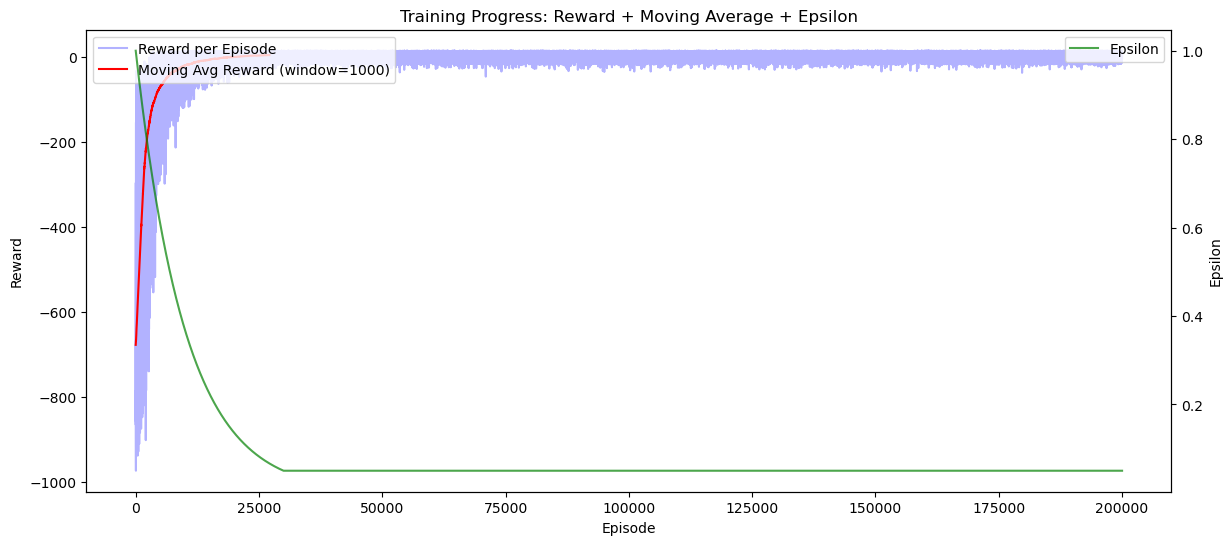

In [314]:
# --- Combined Plot ---
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(rewards, color='blue', alpha=0.3, label='Reward per Episode')
ax1.plot(moving_avg, color='red', label=f'Moving Avg Reward (window={window})')
ax1.set_xlabel("Episode")
ax1.set_ylabel("Reward")
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(epsilons, color='green', label='Epsilon', alpha=0.7)
ax2.set_ylabel("Epsilon")
ax2.legend(loc='upper right')

plt.title("Training Progress: Reward + Moving Average + Epsilon")
plt.show()


# Taxi-v3 Q-Learning Training Insights

## 1. Learning Progress
- Rewards start negative and gradually become positive.
- Indicates the agent is learning effective actions over time.

## 2. Exploration vs. Exploitation
- Epsilon decays from 1.0 to 0.05 around episode 30,000.
- Early episodes: high exploration.
- Later episodes: mostly exploitation of learned strategies.

## 3. Performance Stabilization
- Moving average of rewards plateaus after sufficient training (mostly exploition, applies knowledge).

## 4. Training Trend Visualization
- **Raw Reward:** noisy but improving over time.
- **Moving Average:** smooth upward trend showing learning.
- **Epsilon Decay:** clear transition from exploration to exploitation.

## ✅ Takeaway
- Performance improves steadily and stabilizes once exploration is minimized.


# Phase 3: Testing

**Test:** 500 episodes, always take the best Q-value action.

**Metrics:**
- Total reward per episode
- Steps per episode
- Illegal actions (reward = -10)


In [315]:
# 3. Testing
test_episodes = 500
rewards = []
steps_list = []
illegal_actions = 0

for _ in range(test_episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0
    steps = 0

    while not done:
        # Always follow the best policy
        action = np.argmax(Q[state])
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Count illegal actions (-10 penalty)
        if reward == -10:
            illegal_actions += 1

        total_reward += reward
        steps += 1
        state = next_state

    rewards.append(total_reward)
    steps_list.append(steps)

# Print evaluation summary
print("\n--- Testing Evaluation ---")
print(f"Average reward over {test_episodes} episodes: {np.mean(rewards):.2f}")
print(f"Average steps per episode: {np.mean(steps_list):.2f}")
print(f"Average illegal actions per episode: {illegal_actions/test_episodes:.2f}")


--- Testing Evaluation ---
Average reward over 500 episodes: 7.94
Average steps per episode: 13.06
Average illegal actions per episode: 0.00


### Exploration vs. Exploitation

- **Exploration:**  
  The agent tries new or random actions to discover better strategies. Early in training, this helps gather knowledge but may lead to mistakes.

- **Exploitation:**  
  The agent uses learned knowledge (Q-table) to select the best-known actions, maximizing rewards. Too much exploitation can miss better strategies.

- **Balance:**  
  Start with high exploration (ε ≈ 1), gradually decay epsilon, and finish mostly exploiting with a small chance to explore (ε ≈ 0.05) to avoid suboptimal policies.


In [316]:
np.set_printoptions(threshold=np.inf)
Q

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  2.75200369,   3.94947757,   2.75200369,   3.94947757,
          5.20997639,  -5.05052243],
       [  7.93349184,   9.40367562,   7.93349184,   9.40367562,
         10.9512375 ,   0.40367562],
       [  3.94947757,   5.20997639,   3.94947757,   5.20997639,
          6.53681725,  -3.79002361],
       [ -3.27518659,  -4.11142726,  -3.27518659,  -4.11142726,
        -13.11142726, -13.11142726],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -3.27518659,  -4.11142726,  -3.27518659,  -4.11142726,
        -13.11142726, -13.11142726],
       [ -0.49300084,  -1.46835079,  -0.49300084,  -1.46835079,
        -10.46835079, -10.46835079],
       [  5.20997639,   3.94947757,   2.75200369,   3.94947757,
         -5.05052243,  -5.05052243],
       [  0.53368333,  -0.49300084,  -1.46835079,  -0.49300084,
         -9.49300084,  -9.4